# Unit 5 - Financial Planning

In [74]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
%matplotlib inline

In [75]:
# Load .env enviroment variables
load_dotenv("alpaca_keys.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [5]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [6]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
btc_url = btc_url +"?format=json"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"
eth_url =eth_url +"?format=json"

In [7]:
# Fetch current BTC price
btc_response_data = requests.get(btc_url) 
btc_response_content = btc_response_data.content
btc_data = btc_response_data.json()
print(json.dumps(btc_data, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18853943,
            "total_supply": 18853943,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 63456.0,
                    "volume_24h": 32222945893,
                    "market_cap": 1196389574346,
                    "percentage_change_1h": 0.104181044946911,
                    "percentage_change_24h": 4.41422219749467,
                    "percentage_change_7d": 3.03959119322784,
                    "percent_change_1h": 0.104181044946911,
                    "percent_change_24h": 4.41422219749467,
                    "percent_change_7d": 3.03959119322784
                }
            },
            "last_updated": 1635169433
        }
    },
    "metadata": {
        "timestamp": 1635169433,
        "num_crypto

In [8]:
btc_price = btc_data["data"]["1"]["quotes"]["USD"]['price']
btc_price

63456.0

In [9]:
# Fetch current ETH price
eth_response_data = requests.get(eth_url)
eth_response_content = eth_response_data.content
eth_data = eth_response_data.json()
print(json.dumps(eth_data, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 118071321,
            "total_supply": 118071321,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 4167.55,
                    "volume_24h": 16946577039,
                    "market_cap": 491349987928,
                    "percentage_change_1h": 0.121534225340959,
                    "percentage_change_24h": 2.53442518080469,
                    "percentage_change_7d": 8.12949071218426,
                    "percent_change_1h": 0.121534225340959,
                    "percent_change_24h": 2.53442518080469,
                    "percent_change_7d": 8.12949071218426
                }
            },
            "last_updated": 1635169400
        }
    },
    "metadata": {
        "timestamp": 1635169400,
        "num_cryp

In [10]:
eth_price = eth_data["data"]["1027"]["quotes"]["USD"]['price']
eth_price

4167.55

In [11]:
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price


# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $76147.20
The current value of your 5.3 ETH is $22088.01


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [76]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [77]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


In [78]:
# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [79]:
# Format current date as ISO format
start_date = pd.Timestamp("2016-10-21", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-10-21", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Preview DataFrame
df_ticker

AGG                                        \
                             open     high       low   close     volume   
time                                                                      
2017-10-31 00:00:00-04:00  109.52  109.550  109.4400  109.45  2427946.0   
2017-11-01 00:00:00-04:00  109.17  109.410  109.1700  109.29  2289204.0   
2017-11-02 00:00:00-04:00  109.35  109.495  109.3310  109.36  1870711.0   
2017-11-03 00:00:00-04:00  109.48  109.480  109.2900  109.46  1511462.0   
2017-11-06 00:00:00-05:00  109.56  109.590  109.4600  109.54  1120425.0   
...                           ...      ...       ...     ...        ...   
2021-10-15 00:00:00-04:00  114.61  114.630  114.5100  114.56  3829388.0   
2021-10-18 00:00:00-04:00  114.33  114.560  114.2500  114.49  5145953.0   
2021-10-19 00:00:00-04:00  114.37  114.370  114.1600  114.18  3999066.0   
2021-10-20 00:00:00-04:00  114.17  114.290  114.0600  114.07  5881766.0   
2021-10-21 00:00:00-04:00  114.01  114.040  113.8423  113.85  4741154.0   

                              SPY                                       
                             open     high     low   close      volume  
time                                                                    
2017-10-31 00:00:00-04:00     NaN      NaN     NaN     NaN         NaN  
2017-11-01 00:00:00-04:00  258.04  258.430  257.07  257.51  40454406.0  
2017-11-02 00:00:00-04:00  257.41  257.750  256.19  257.61  42432046.0  
2017-11-03 00:00:00-04:00  257.78  258.500  257.30  258.44  38008582.0  
2017-11-06 00:00:00-05:00  258.29  259.000  258.22  258.82  22683758.0  
...                           ...      ...     ...     ...         ...  
2021-10-15 00:00:00-04:00  444.76  446.260  444.09  445.83  55980388.0  
2021-10-18 00:00:00-04:00  443.97  447.550  443.27  447.22  51994387.0  
2021-10-19 00:00:00-04:00  448.92  450.700  448.27  450.68  40790864.0  
2021-10-20 00:00:00-04:00  451.13  452.732  451.01  452.39  41594298.0  
2021-10-21 00:00:00-04:00  451.76  453.829  451.31  453.61  33945007.0  

[1001 rows x 10 columns]

In [80]:
# Pick AGG and SPY close prices
df_closing_prices = pd.DataFrame()
agg_close_price = df_ticker["AGG"]["close"]["2021-10-15"]
spy_close_price = df_ticker["SPY"]["close"]["2021-10-15"]


In [81]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.56
Current SPY closing price: $445.83


In [82]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

In [83]:
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22291.50
The current value of your 200 AGG shares is $22912.00


### Savings Health Analysis

In [84]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_value = my_btc_value + my_eth_value
shares_value = my_spy_value + my_agg_value

# Create savings DataFrame
df_savings = pd.DataFrame()
df_savings["crypto"] = [crypto_value]
df_savings["shares"] = [shares_value]

# Display savings DataFrame
display(df_savings)

,crypto,shares
0,98235.215,45203.5


In [85]:
df_savings = pd.DataFrame()
df_savings["crypto"] = [crypto_value]
df_savings["shares"] = [shares_value]

In [86]:
# Plot savings pie chart


In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings

# Validate saving health
# YOUR CODE HERE!

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [87]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-10-21', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-10-21', tz='America/New_York').isoformat()

In [88]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
tickers = ["AGG", "SPY"]
timeframe = "1D"
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open     high      low   close     volume   
time                                                                     
2017-10-31 00:00:00-04:00  109.52  109.550  109.440  109.45  2427946.0   
2017-11-01 00:00:00-04:00  109.17  109.410  109.170  109.29  2289204.0   
2017-11-02 00:00:00-04:00  109.35  109.495  109.331  109.36  1870711.0   
2017-11-03 00:00:00-04:00  109.48  109.480  109.290  109.46  1511462.0   
2017-11-06 00:00:00-05:00  109.56  109.590  109.460  109.54  1120425.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2017-10-31 00:00:00-04:00     NaN     NaN     NaN     NaN         NaN  
2017-11-01 00:00:00-04:00  258.04  258.43  257.07  257.51  40454406.0  
2017-11-02 00:00:00-04:00  257.41  257.75  256.19  257.61  42432046.0  
2017-11-03 00:00:00-04:00  257.78  258.50  257.30  258.44  38008582.0  
2017-11-06 00:00:00-05:00  258.29  259.00  258.22  258.82  22683758.0

In [89]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.6, .4],
    num_simulation = 500,
    num_trading_days = 252 * 30 
)

In [90]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                       \
                             open     high      low   close     volume   
time                                                                     
2017-10-31 00:00:00-04:00  109.52  109.550  109.440  109.45  2427946.0   
2017-11-01 00:00:00-04:00  109.17  109.410  109.170  109.29  2289204.0   
2017-11-02 00:00:00-04:00  109.35  109.495  109.331  109.36  1870711.0   
2017-11-03 00:00:00-04:00  109.48  109.480  109.290  109.46  1511462.0   
2017-11-06 00:00:00-05:00  109.56  109.590  109.460  109.54  1120425.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-10-31 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2017-11-01 00:00:00-04:00    -0.001462  258.04  258.43  257.07  257.51   
2017-11-02 00:00:00-04:00     0.000640  257.41  257.75  256.19  257.61   
2017-11-03 00:00:00-04:00     0.000914  257.78  258.50  257.30  258.44   
2017-11-06 00:00:00-05:00     0.000731  258.29  259.00  258.22  258.82   

                                                    
                               volume daily_return  
time                                                
2017-10-31 00:00:00-04:00         NaN          NaN  
2017-11-01 00:00:00-04:00  40454406.0          NaN  
2017-11-02 00:00:00-04:00  42432046.0     0.000388  
2017-11-03 00:00:00-04:00  38008582.0     0.003222  
2017-11-06 00:00:00-05:00  22683758.0     0.001470

In [91]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998887,0.996980,1.002525,1.014430,1.000336,0.999325,0.998159,1.000762,0.999943,0.999231,...,0.993944,1.002616,0.993926,1.004853,0.995255,1.005018,0.998181,1.001298,0.985091,0.995722
2,1.003485,0.996232,1.003944,1.016519,1.001134,0.990914,0.990254,0.999901,0.992940,0.998996,...,1.002359,0.998131,0.991006,1.011978,0.997700,1.008432,1.004628,1.002680,0.988665,1.000576
3,1.007715,0.997452,1.012833,1.019154,1.001678,0.998035,0.984723,0.993513,0.998098,0.996836,...,1.005937,0.996823,0.993173,1.012604,0.999635,1.010700,0.998962,0.997800,0.984971,0.999968
4,1.009965,0.993882,1.013995,1.019526,1.002623,0.992970,0.979468,0.992067,0.998286,1.004550,...,1.000471,1.007693,0.995684,1.020374,1.003615,1.005225,1.006770,0.999639,0.983101,1.003915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.325301,5.673725,7.376929,7.988287,8.548542,6.884855,4.960689,7.637060,8.673580,20.338176,...,13.641611,5.363650,8.998243,11.154338,7.313650,6.555266,7.342266,13.138510,5.318495,5.461523
7557,3.346748,5.660195,7.342803,7.909646,8.499349,6.956069,4.936827,7.665274,8.759228,20.154855,...,13.713903,5.406721,9.065420,11.161669,7.287871,6.598375,7.323637,13.027078,5.312638,5.476344
7558,3.334409,5.637552,7.378049,7.846719,8.601421,6.997387,4.908107,7.624809,8.824139,20.218600,...,13.663410,5.402260,9.116307,11.098035,7.323445,6.601803,7.275919,13.036556,5.260464,5.494108
7559,3.332602,5.625172,7.380186,7.931935,8.650080,7.006782,4.921688,7.695467,8.890408,20.412601,...,13.615449,5.395510,9.190521,11.191797,7.285648,6.557543,7.281433,13.186389,5.249867,5.475742


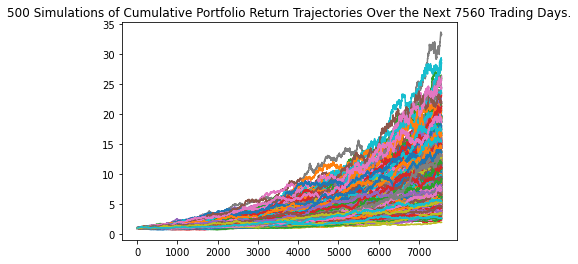

In [92]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

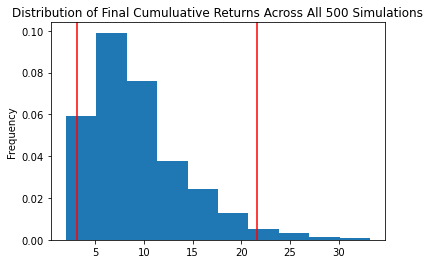

In [93]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [94]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              9.284568
std               4.965223
min               1.955448
25%               5.627944
50%               8.300268
75%              11.626866
max              33.240084
95% CI Lower      3.124371
95% CI Upper     21.597051
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [95]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8] * initial_investment, 2)
ci_upper = round(tbl[9] * initial_investment, 2)
                 
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $62487.42 and $431941.01


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [96]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8] * initial_investment, 2)
ci_upper = round(tbl[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $93731.14 and $647911.52


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.9, .1],
    num_simulation = 500,
    num_trading_days = 252 * 5
)

In [65]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997962,1.000851,0.997072,1.004445,1.007529,1.003283,1.004723,1.006463,0.992618,0.996623,...,1.001946,1.002039,0.990629,1.000542,0.996806,1.007803,0.989449,0.994984,0.995244,0.991010
2,1.000206,0.999459,0.988236,1.011332,1.010780,1.006549,1.004885,1.007629,0.993733,0.996454,...,0.991363,0.995653,0.990615,0.989736,1.007650,1.007781,0.990229,0.993338,1.001402,0.995554
3,1.004143,0.999475,0.982490,1.014282,1.004980,1.011256,0.997066,1.001563,0.987541,0.994954,...,1.001268,0.999047,0.987063,0.980059,1.007252,1.003320,1.005217,0.987382,1.002213,1.005578
4,1.013065,1.008714,0.978542,1.014489,1.013937,1.006055,1.003089,1.000256,0.979120,0.987583,...,1.012165,0.996196,0.996042,0.984259,1.002938,1.001856,1.006784,0.982300,1.002701,1.017969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,15.932600,4.069349,7.082492,7.228762,11.359482,7.251894,4.248930,14.515339,7.584376,4.085544,...,3.280109,9.525497,7.881290,15.383251,7.694795,5.762376,17.161825,4.268104,8.180086,5.907335
7557,16.000327,4.041848,7.074426,7.187806,11.428867,7.304162,4.261617,14.548037,7.551743,4.084079,...,3.294983,9.503505,7.879429,15.426386,7.707095,5.757604,17.320902,4.275700,8.217546,5.815556
7558,15.949571,4.066802,7.088616,7.118405,11.274513,7.368559,4.293581,14.519668,7.561857,4.106937,...,3.299707,9.615886,7.917764,15.507854,7.679872,5.760120,17.408972,4.285121,8.184857,5.817580
7559,15.941604,4.108223,7.036699,7.087733,11.350589,7.393569,4.287893,14.429660,7.588424,4.104572,...,3.293152,9.639557,7.876309,15.544297,7.740036,5.794916,17.455927,4.219665,8.154603,5.819154


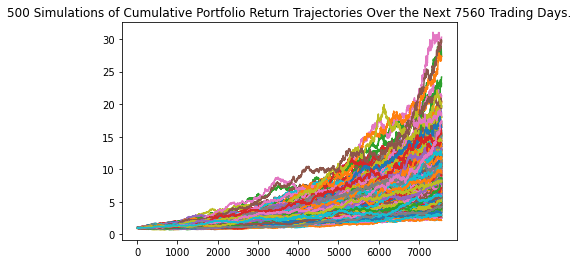

In [66]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

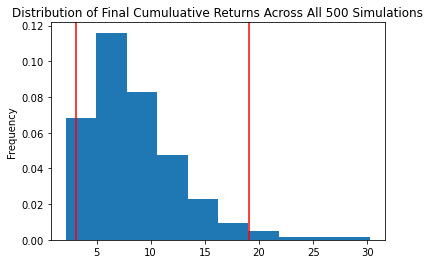

In [67]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

In [97]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              8.506103
std               4.234446
min               2.155199
25%               5.639952
50%               7.590441
75%              10.614028
max              30.262113
95% CI Lower      3.095254
95% CI Upper     19.030522
Name: 7560, dtype: float64


In [99]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8] * initial_investment, 2)
ci_upper_five = round(tbl[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $61905.07 and $380610.44


### Ten Years Retirement Option

In [101]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.8, .2],
    num_simulation = 500,
    num_trading_days = 252 * 10
)

In [102]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001920,1.003384,0.996143,0.999906,0.996342,1.003102,0.996024,0.997734,0.999203,1.004725,...,1.001155,1.003251,0.995482,0.996923,1.001681,0.995953,1.002699,1.001425,1.002950,0.995112
2,0.998951,1.002787,0.990749,0.995309,0.993468,1.006565,0.995073,0.988376,0.999137,1.005579,...,1.000243,1.004068,1.000228,0.996966,0.999350,0.999385,1.009311,1.003071,0.996556,0.994822
3,0.996318,1.004590,0.990712,0.995674,0.995806,1.004333,0.994728,0.985855,0.997193,1.003203,...,0.998902,1.007170,1.001818,0.993899,1.002762,0.999069,1.007033,0.994637,1.001674,0.998702
4,1.002228,1.007688,0.991309,0.999488,0.999116,1.009452,0.998289,0.990937,0.998743,0.998606,...,0.998949,1.002667,1.012960,0.996557,1.000990,0.999242,1.010877,0.993632,0.994416,1.001295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.167972,1.490256,1.476439,1.583198,1.586462,1.781532,1.839168,1.670090,1.675293,1.464681,...,2.338583,1.809483,1.477128,1.750762,1.512332,1.623931,1.525001,1.585843,1.904683,1.438978
2517,1.173192,1.489110,1.473713,1.581131,1.592214,1.782260,1.830950,1.661770,1.671002,1.464551,...,2.336150,1.813090,1.477572,1.760670,1.513222,1.614748,1.517931,1.580665,1.908683,1.438606
2518,1.181464,1.491650,1.469564,1.581473,1.592394,1.774059,1.822366,1.664109,1.665204,1.470533,...,2.340318,1.826505,1.483056,1.768332,1.506584,1.617432,1.515173,1.582042,1.924874,1.443596
2519,1.185651,1.487987,1.467892,1.586340,1.596090,1.773116,1.814336,1.672148,1.661095,1.465848,...,2.350598,1.833182,1.473436,1.773612,1.504862,1.614888,1.516188,1.581149,1.929038,1.445982


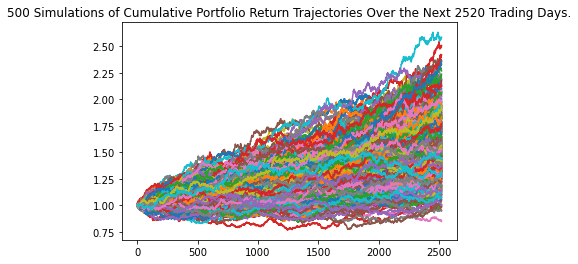

In [103]:
# Plot simulation outcomes
line_plot = MC_tenyear.plot_simulation()

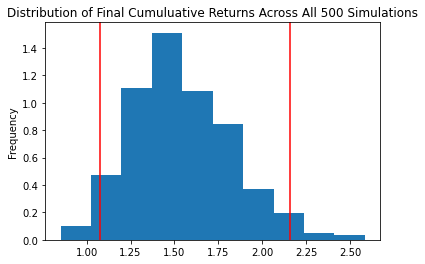

In [104]:
# Plot probability distribution and confidence intervals
dist_plot = MC_tenyear.plot_distribution()

In [105]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_tenyear = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(tbl_tenyear)

count           500.000000
mean              1.540201
std               0.280783
min               0.850943
25%               1.338807
50%               1.510878
75%               1.723577
max               2.585043
95% CI Lower      1.075110
95% CI Upper      2.157112
Name: 2520, dtype: float64


In [106]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_tenyear[8] * initial_investment, 2)
ci_upper_ten = round(tbl_tenyear[9] * initial_investment, 2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $21502.19 and $43142.23
